<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 2

Total points: 70

Team members: Olivia (Ryunghee) Lee (rl29986), Aniket Patil (aap3788)

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

# Answer : 
(a) The bias of a point estimator is the difference between the expected value of the point estimator and the actual value of the population parameter being estimated. The smaller this difference, the lesser the bias.

Model Bias on the other hand is the difference between expected value of the model over all data points and the actual target function (best possible predictor). In other words, it denotes the error occuring due to the assumptions by the model.

(b) For a given sample size, we can vary the training set size on X-axis and measure error on Y-axis to get the learning curve. The model is overfitting if train error decreases with training set size but validation error is higher than train error. This implies that the model is consistently performing worse on validation set but performing well on train set which is classic case of overfitting on train dataset.

The model is underfitting if we're not able to get a sufficient low train set error. The train error curve would be flat or noisy with high error which indicates that model is not able to capture the signal with increasing training set size.


# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

In [4]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
data_load = np.load('./data.npy', allow_pickle = True)

In [9]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")

lrp = LinearRegression()

## Q2 Part A

In [13]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
    indexes = list(range(len(x_train)))
    indexes.sort(key=x_train.__getitem__)
    x_train = np.array(list(map(x_train.__getitem__, indexes)))
    y_train = np.array(list(map(y_train.__getitem__, indexes)))
    
    # Sorting x_test for visualization
    indexes = list(range(len(x_test)))
    indexes.sort(key=x_test.__getitem__)
    x_test = np.array(list(map(x_test.__getitem__, indexes)))
    y_test = np.array(list(map(y_test.__getitem__, indexes)))
    
    # sorting x_all in ascending order
    x_all = np.linspace(-10,10,101).reshape(-1,1)
    indexes = list(range(len(x_all)))
    indexes.sort(key=x_all.__getitem__)
    x_all = np.array(list(map(x_all.__getitem__, indexes)))
    x_all = x_all
    
    # Polynomial of 2 degrees
    deg = 2
    x_train_2 = np.vander(np.squeeze(x_train), deg+1)
    x_test_2 = np.vander(np.squeeze(x_test), deg+1)
    x_all_2 = np.vander(np.squeeze(x_all), deg+1)
    lr_2 = LinearRegression()
    lr_2.fit(x_train_2, y_train)
    pred_2 = lr_2.predict(x_test_2)
    train_pred_2 = lr_2.predict(x_train_2)
    mse_2 = mean_squared_error(y_true=y_test, y_pred=pred_2)

    # Polynomial of 4 degrees
    deg = 4
    x_train_4 = np.vander(np.squeeze(x_train), deg+1)
    x_test_4 = np.vander(np.squeeze(x_test), deg+1)
    x_all_4 = np.vander(np.squeeze(x_all), deg+1)
    lr_4 = LinearRegression()
    lr_4.fit(x_train_4, y_train)
    pred_4 = lr_4.predict(x_test_4)
    train_pred_4 = lr_4.predict(x_train_4)
    mse_4 = mean_squared_error(y_true=y_test, y_pred=pred_4)

    # Polynomial of 7 degrees
    deg = 7
    x_train_7 = np.vander(np.squeeze(x_train), deg+1)
    x_test_7 = np.vander(np.squeeze(x_test), deg+1)
    x_all_7 = np.vander(np.squeeze(x_all), deg+1)
    lr_7 = LinearRegression()
    lr_7.fit(x_train_7, y_train)
    pred_7 = lr_7.predict(x_test_7)
    train_pred_7 = lr_7.predict(x_train_7)
    mse_7 = mean_squared_error(y_true=y_test, y_pred=pred_7)
    
    print("MSE score for 2 degree polynomial on train data is ", round(mean_squared_error(y_true=y_train, y_pred=train_pred_2), 2))
    print("MSE score for 2 degree polynomial on test data is ", round(mse_2, 2))
    
    print("MSE score for 4 degree polynomial on train data is ", round(mean_squared_error(y_true=y_train, y_pred=train_pred_4), 2))
    print("MSE score for 4 degree polynomial on test data is ", round(mse_4, 2))
    
    print("MSE score for 7 degree polynomial on train data is ", round(mean_squared_error(y_true=y_train, y_pred=train_pred_7), 2))
    print("MSE score for 7 degree polynomial on test data is ", round(mse_7, 2))
    
    # Predicting values x_all
    pred_all_2 = lr_2.predict(x_all_2)
    pred_all_4 = lr_4.predict(x_all_4)
    pred_all_7 = lr_7.predict(x_all_7)
    
    
    # Ploting the results
    fig, ax = plt.subplots(1, 1, figsize=(12,7))
    ax.scatter(x_train, y_train)
    ax.scatter(x_test, y_test, color = "orange")
    ax.plot(x_all, pred_all_2)
    ax.plot(x_all, pred_all_4)
    ax.plot(x_all, pred_all_7)
    
    ax.plot(x_test, pred_2)
    ax.plot(x_test, pred_4)
    ax.plot(x_test, pred_7)
    ax.set_ylim([-35,35])
    ax.set_xlim([-5,5])
    ax.legend(['2 deg poly prediction on x_all', '4 deg poly prediction on x_all', '7 deg poly prediction on x_all', 
               '2 deg poly prediction on x_test', '4 deg poly prediction on x_test', '7 deg poly prediction on x_test',
              'x_train scatter', 'x_test scatter'])
    
    plt.show()
    return ([
        round(mean_squared_error(y_true=y_train, y_pred=train_pred_2), 2),
        round(mean_squared_error(y_true=y_train, y_pred=train_pred_4), 2),
        round(mean_squared_error(y_true=y_train, y_pred=train_pred_7), 2)
    ],
    [
        round(mean_squared_error(y_true=y_test, y_pred=pred_2),2),
        round(mean_squared_error(y_true=y_test, y_pred=pred_4),2),
        round(mean_squared_error(y_true=y_test, y_pred=pred_7),2)
    ])

MSE score for 2 degree polynomial on train data is  247.3
MSE score for 2 degree polynomial on test data is  320.06
MSE score for 4 degree polynomial on train data is  31.72
MSE score for 4 degree polynomial on test data is  31.29
MSE score for 7 degree polynomial on train data is  30.68
MSE score for 7 degree polynomial on test data is  33.41


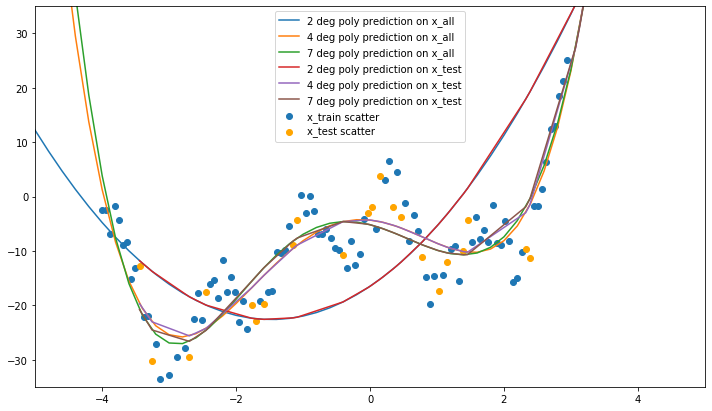

In [14]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Q2 Part B


The MSE scores are high for train and test set using the simplest model (2nd degree polynomial) which suggests high bias and underfitting. As the model complexity is increased to 4th degree polynomial, the train and test scores both reduce to around 31. The train set MSE score continues to decrease as the complexity is increased further to 7th degree polynomial whereas the test set MSE score starts to increase which suggests high variance or overfitting. 

As explained above, a degree-4 polynomial gives the best performance in terms of bias-variance as a lesser complex model suffers from bias (high MSE on both train and test) and a more complex model suffers from variance (low train MSE and high test MSE).

20% data
MSE score for 2 degree polynomial on train data is  161.17
MSE score for 2 degree polynomial on test data is  402.32
MSE score for 4 degree polynomial on train data is  35.12
MSE score for 4 degree polynomial on test data is  38.34
MSE score for 7 degree polynomial on train data is  22.54
MSE score for 7 degree polynomial on test data is  135.21


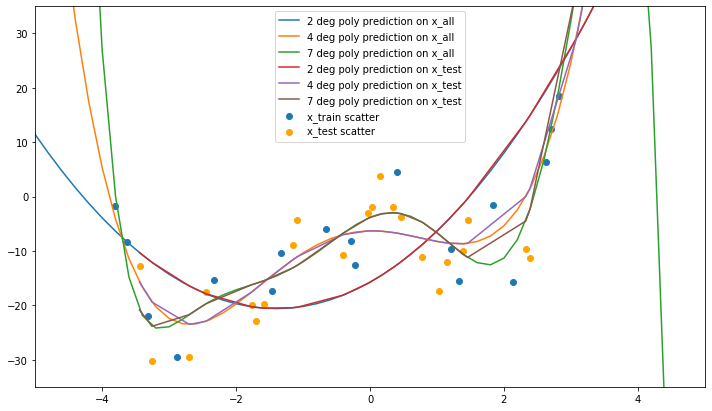

40% data
MSE score for 2 degree polynomial on train data is  150.33
MSE score for 2 degree polynomial on test data is  405.81
MSE score for 4 degree polynomial on train data is  31.62
MSE score for 4 degree polynomial on test data is  33.16
MSE score for 7 degree polynomial on train data is  25.49
MSE score for 7 degree polynomial on test data is  61.24


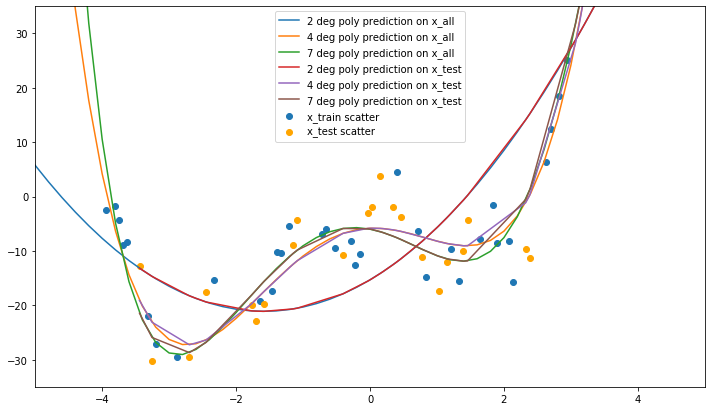

60% data
MSE score for 2 degree polynomial on train data is  150.08
MSE score for 2 degree polynomial on test data is  403.25
MSE score for 4 degree polynomial on train data is  29.19
MSE score for 4 degree polynomial on test data is  31.78
MSE score for 7 degree polynomial on train data is  26.1
MSE score for 7 degree polynomial on test data is  60.17


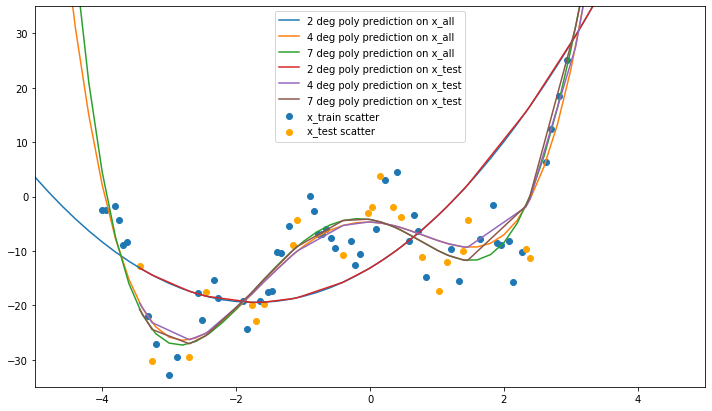

80% data
MSE score for 2 degree polynomial on train data is  168.12
MSE score for 2 degree polynomial on test data is  407.59
MSE score for 4 degree polynomial on train data is  29.31
MSE score for 4 degree polynomial on test data is  32.52
MSE score for 7 degree polynomial on train data is  26.55
MSE score for 7 degree polynomial on test data is  48.08


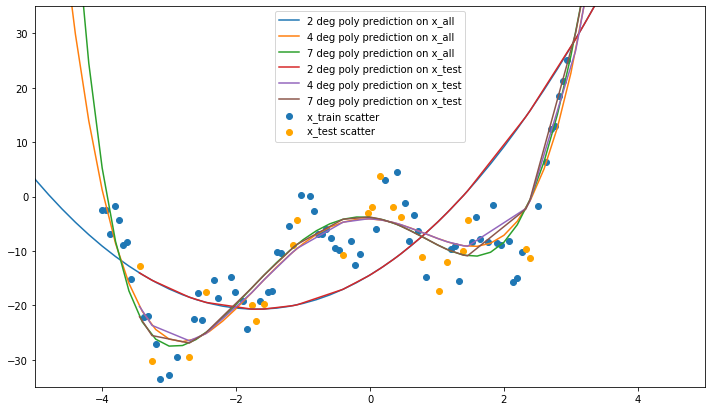

100% data
MSE score for 2 degree polynomial on train data is  247.3
MSE score for 2 degree polynomial on test data is  320.06
MSE score for 4 degree polynomial on train data is  31.72
MSE score for 4 degree polynomial on test data is  31.29
MSE score for 7 degree polynomial on train data is  30.68
MSE score for 7 degree polynomial on test data is  33.41


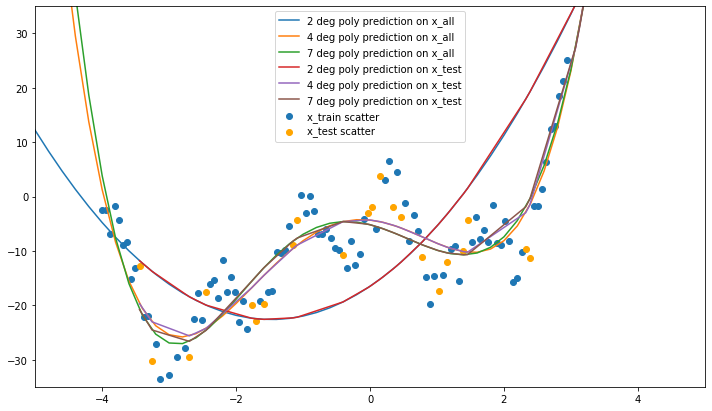

In [16]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

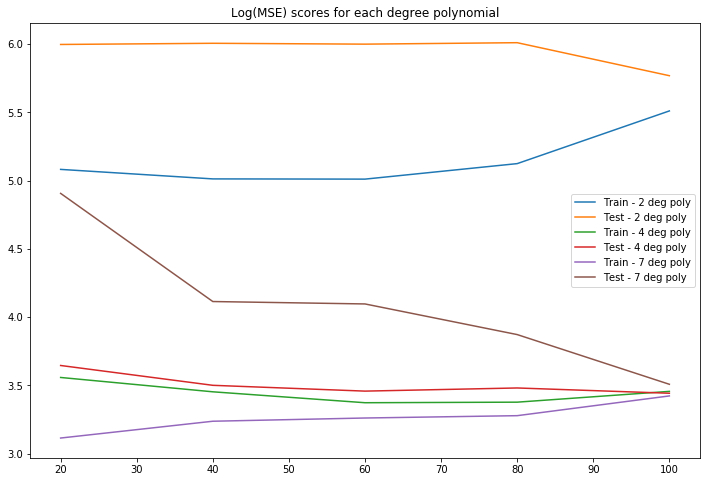

In [17]:
# Ploting the results
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot([20,40,60,80,100], 
list(np.log([train_rmses_20[0], train_rmses_40[0], train_rmses_60[0], train_rmses_80[0], train_rmses_100[0]])))
ax.plot([20,40,60,80,100], 
list(np.log([test_rmses_20[0], test_rmses_40[0], test_rmses_60[0], test_rmses_80[0], test_rmses_100[0]]))
)



ax.plot([20,40,60,80,100], 
list(np.log([train_rmses_20[1], train_rmses_40[1], train_rmses_60[1], train_rmses_80[1], train_rmses_100[1]])))
ax.plot([20,40,60,80,100], 
list(np.log([test_rmses_20[1], test_rmses_40[1], test_rmses_60[1], test_rmses_80[1], test_rmses_100[1]]))
)
ax.title.set_text("Log(MSE) scores for 4 degree polynomial")

ax.plot([20,40,60,80,100], 
list(np.log([train_rmses_20[2], train_rmses_40[2], train_rmses_60[2], train_rmses_80[2], train_rmses_100[2]])))
ax.plot([20,40,60,80,100], 
list(np.log([test_rmses_20[2], test_rmses_40[2], test_rmses_60[2], test_rmses_80[2], test_rmses_100[2]]))
)

ax.legend(['Train - 2 deg poly', 'Test - 2 deg poly',
          'Train - 4 deg poly', 'Test - 4 deg poly',
          'Train - 7 deg poly', 'Test - 7 deg poly'])
ax.title.set_text("Log(MSE) scores for each degree polynomial")

plt.show()

# Answer : 
We can see that learning curve for 4th degree polynomial stays nearly constant throughout. This means degree-4 polynomial has low variance as changing train set is giving consistent result. It also has overall low log(MSE) suggesting bias is low as well.

For 2nd degree polynomial, both train and test MSE is high consistently. This suggests  high bias in the model since its not able to capture signal in data. 

For 7th degree polynomial, only when the entire dataset is used for training does the log(MSE) reach acceptable levels. Overall trend is that training MSE is low but the test MSE is extremely high suggesting high variance in the model. 

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 


# Answer : 
1. Momentum smoothens out the descent on the loss function by incorporating previously calcuated gradients into weight updates. This way, the vertical oscillations in previous gradients are dampened (since gradients are in both positive and negative direction). Also, since all the previous gradients are moving towards the local optima, we are left with a higher average in the horizontal direction. The result is that we move faster towards the convergence. A higher value for hyperparameter beta means we are giving higher weightage to previous gradients.


2. The Mini-batch Stochastic gradient descent is sort of like the best of both worlds between Batch Gradient Descent (BGD) and Stochastic Gradient Descent (SGD). Below are its key advantages -

    (a) The weights are updated more frequently than BGD.

    (b) Memory consumption is less as we don't need the entire training dataset in memory.

    (c) Optimization is computationally more efficient than SGD since mini-batch utilizes vectorization in its calculations.

# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 

We will derive coefficients update for gradient descent and use it iteratively on single point to perform as SGD.

The following assumptions are made for derivation:

x : Matrix of size $n\times4$ with 4 columns $(1, e^{-x_1}, x_1, x_1x_2)$

w : $weight$ vector of size $4\times1$ - $(w_0, w_1, w_2, w_3)$

Estimator of size $n\times1 $: $$h_w(x) = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2$$
$$h_w(x) = x\times w$$

True values: vector $y$ of size $n\times1$

Loss function: $L = \frac{\sum(h_w(x) - y)^2}{2}$

Learning rate: $\alpha$

Weight Updation: $$w^{new}= w^{current} - \alpha\frac{\partial L}{\partial w}$$

$$\frac{\partial L}{\partial w} = \frac{2(h_w(x) - y)}{2}\frac{\partial (h_w(x) - y)}{\partial w}$$

$$\frac{\partial L}{\partial w} = (h_w(x) - y)\frac{\partial h_w(x)}{\partial w}$$

$$\frac{\partial h_w(x)}{\partial w} = \frac{\partial w_0 + w_1 e^{-x_1}+ w_2 x_1 + w_3 x_1x_2}{\partial w}$$

$$[\frac{\partial h_w(x)}{\partial w_0}, \frac{\partial h_w(x)}{\partial w_1}, \frac{\partial h_w(x)}{\partial w_2}, \frac{\partial h_w(x)}{\partial w_3}]  = [1, e^{-x_1}, x_1, x_1x_2]$$

$$\frac{\partial h_w(x)}{\partial w} = x$$

$$\frac{\partial L}{\partial w} = (h_w(x) - y)x$$

$$w^{new}= w^{current} - \alpha\times(h_w(x) - y)'\times x$$

$$w^{new}= w^{current} - \alpha\times(x*w - y)'\times x$$

When weight is updated iteratively using 1 data point at a time, Gradient Descent becomes SGD
<br>
<br>

2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [19]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from operator import itemgetter
warnings.filterwarnings("ignore")

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        summation=0
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                #compute error
                error = (y[i]-(np.matmul(X[i],self.coef.T)))
                # Compute gradients
                tempcoef=self.coef.copy()
                #excluding the intercept term from regularization
                tempcoef[0]=0 
                gradient= error*X[i] + 2*(self.regularization)*tempcoef
                # Update weights
                self.sgd(-gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

            
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            plt.show()

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = np.exp(-X[:,0])
        x[:,3] = X[:,0]*X[:,1]
        
        return x
        
    def linearPredict(self, X):
        return (np.dot(X,self.coef))

In [20]:
data = pd.read_csv(r'G:\My Drive\Mccombs MSBA\Courses\Advanced ML\Assignment 2\SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

# Answer :

Best combo of hyperparameters at learning rate: 0.01 and regularization penalty: 0


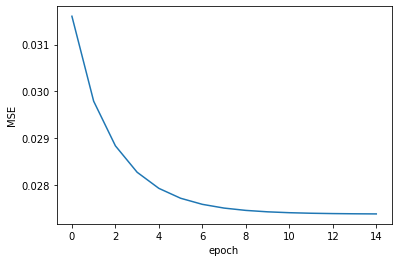

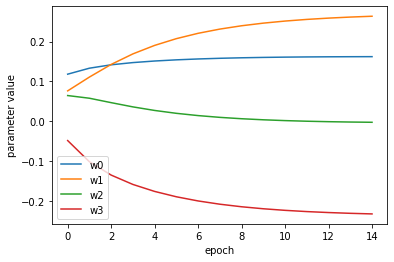

Best combo of hyperparameters at learning rate: 0.001 and regularization penalty: 0


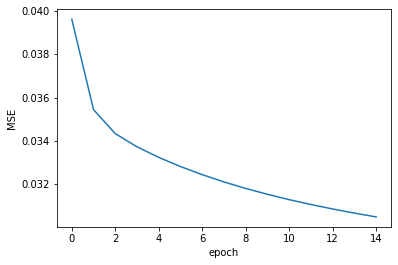

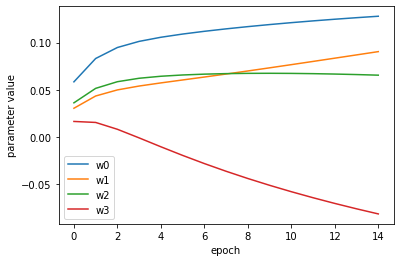

In [25]:
import warnings
warnings.filterwarnings("ignore")
from operator import itemgetter

combos=[]
for l in learning_rate:
    for r in regularization:
        reg = Regression(l,r,15)
        reg.fit(X,y,plot=False)
        combos.append((l, r, reg.lowest_mse))

combos = sorted(combos, key=lambda elem: elem[2])[0:2]

# Best combo of hyperparameters
print('Best combo of hyperparameters at learning rate:', combos[0][0], 'and regularization penalty:', combos[0][1])
reg1 = Regression(combos[0][0],combos[0][1],15)
reg1.fit(X,y,plot=True)

# Second-best combo of hyperparameters
print('Best combo of hyperparameters at learning rate:', li[2][0], 'and regularization penalty:', li[2][1])
reg2 = Regression(combos[1][0],combos[1][1],15)
reg2.fit(X,y,plot=True)